# welter
## Issue 35: Figure of postage stamps of spectral features
### Part I: Try it out

In [1]:
import os
import json
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [3]:
%matplotlib inline

## Luhman data

In [18]:
ApJDF = "/Users/gully/GitHub/ApJdataFrames/data/"

luhman2003_tbl2 = pd.read_csv(ApJDF+'Luhman2003/tbl2.csv', sep='\t', 
                              usecols=['LBol', 'Teff']).dropna() #IC348
luhman2004c_tbl3 = pd.read_csv(ApJDF+'Luhman2004c/tbl3.csv', sep='\t', 
                               usecols=["Lbol","Teff"]).dropna() #Taurus
luhman2007_tbl6 = pd.read_csv(ApJDF+'Luhman2007/tbl6.csv', sep='\t',
                              usecols=['L_bol', 'T_eff']).dropna() #Cha I
luhman2009_tbl2 = pd.read_csv(ApJDF+'Luhman2009/tbl2.csv', sep='\t',
                              usecols=['L_bol', 'T_eff']).dropna() # More Taurus

BCAH2002_iso = pd.read_csv(ApJDF+'BCAH2002/BCAH2002_isochrones.csv', sep='\t') # Models
BCAH2002_mod = pd.read_csv(ApJDF+'BCAH2002/BCAH2002_models.csv', sep='\t') # Models

luhman2007_tbl6_all = pd.read_csv(ApJDF+'Luhman2007/tbl6.csv', sep='\t').dropna() #Cha I

luhman2007_tbl6 = luhman2007_tbl6[~luhman2007_tbl6.T_eff.str.contains(r'\\')]

## BCAH2002 isochrones

In [4]:
from isochrones.bcah2002 import BCAH2002_Isochrone

In [5]:
bcah = BCAH2002_Isochrone()

In [6]:
import pandas as pd

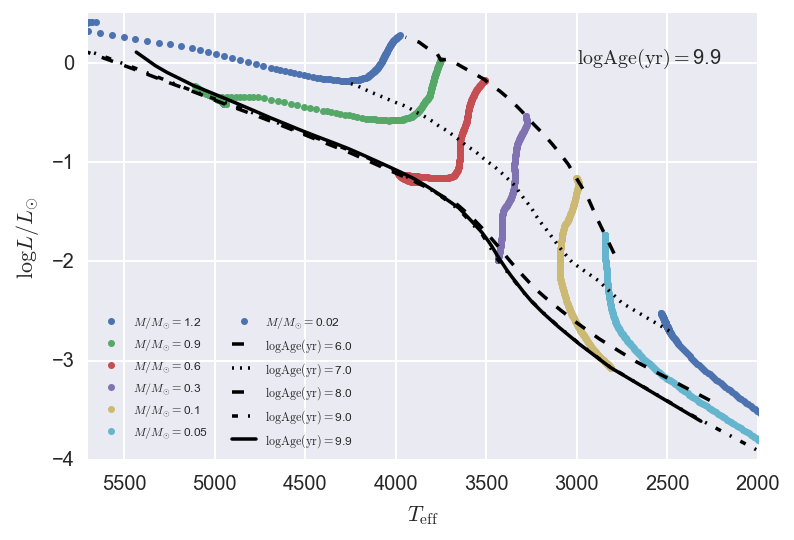

In [7]:
for mass in [0.02, 0.05, 0.1, 0.3, 0.6, 0.9, 1.2][::-1]:
    ev = bcah.evtrack(mass,dage=0.01, minage=6.0, maxage=9.9)
    plt.plot((ev['Teff']),ev['logL'],'.', alpha=1.0, label = '$M/M_{\odot} = $'+'{}'.format(mass))

for age, ls in zip([6.0, 7.0, 8.0, 9.0, 9.9], ['k--', 'k:', 'k--', 'k-.', 'k-']):
    ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
    plt.plot((ev['Teff']),ev['logL'], ls, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

plt.text(3000, 0.0, '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age), fontsize=10)

plt.xlabel('$T_\mathrm{eff}$')
plt.ylabel('$\log{L/L_{\odot}}$')
plt.xlim(5700, 2000);
plt.ylim(-4.0, 0.5);
plt.yticks(np.arange(-4, 0.0+1, 1.0))
plt.legend(loc='lower left', ncol=2, fontsize=6)

### Animate it

In [8]:
from matplotlib import animation

In [13]:
sns.set_style('ticks')
sns.set_context('talk', font_scale=1.5)

In [10]:
np.log10(4.6E9)

9.6627578316815743

### Frame 1: Just the main sequence

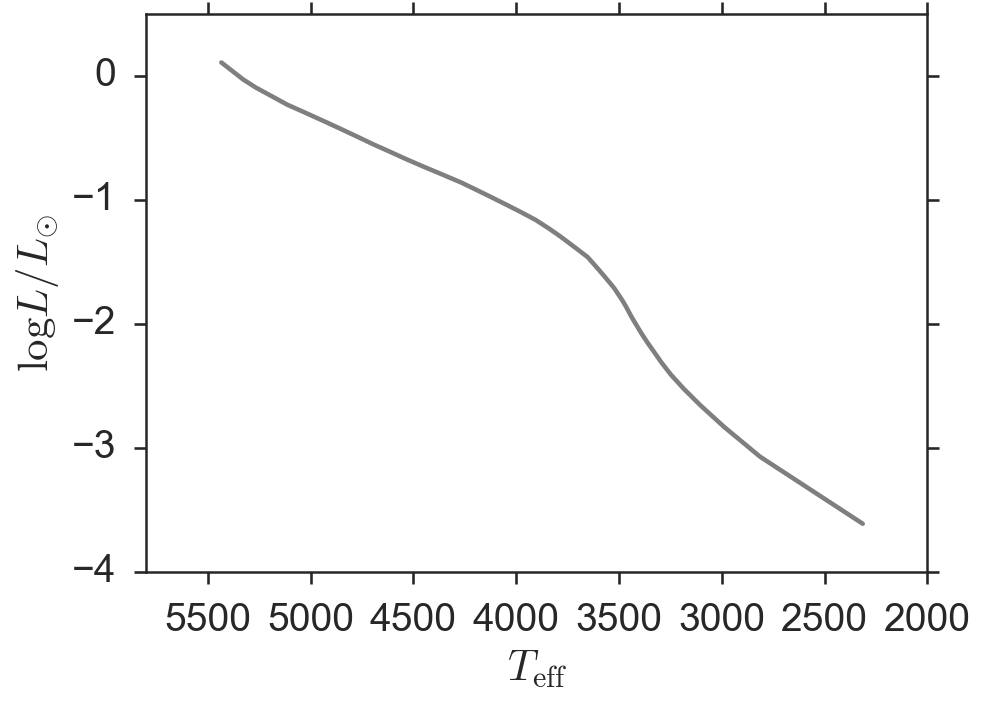

In [24]:
fig = plt.figure(figsize=(7, 5))
ax = plt.axes()

ax.set_xlabel('$T_\mathrm{eff}$')
ax.set_ylabel('$\log{L/L_{\odot}}$')
ax.set_xlim(5800, 2000);
ax.set_ylim(-4.0, 0.5);
ax.set_yticks(np.arange(-4, 0.0+1, 1.0))

for age, ls in zip([9.9], ['k-']):
    ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
    plt.plot(ev['Teff'],ev['logL'], ls, alpha=0.5, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

#ax.plot([5777.0], [0.0], 'yo', label = 'Sun $\log{\mathrm{Age (yr)}} = 9.66$')
    

plt.savefig('../results/main_sequence.png', dpi=300, bbox_inches='tight')

### Frame 2: Add density regions

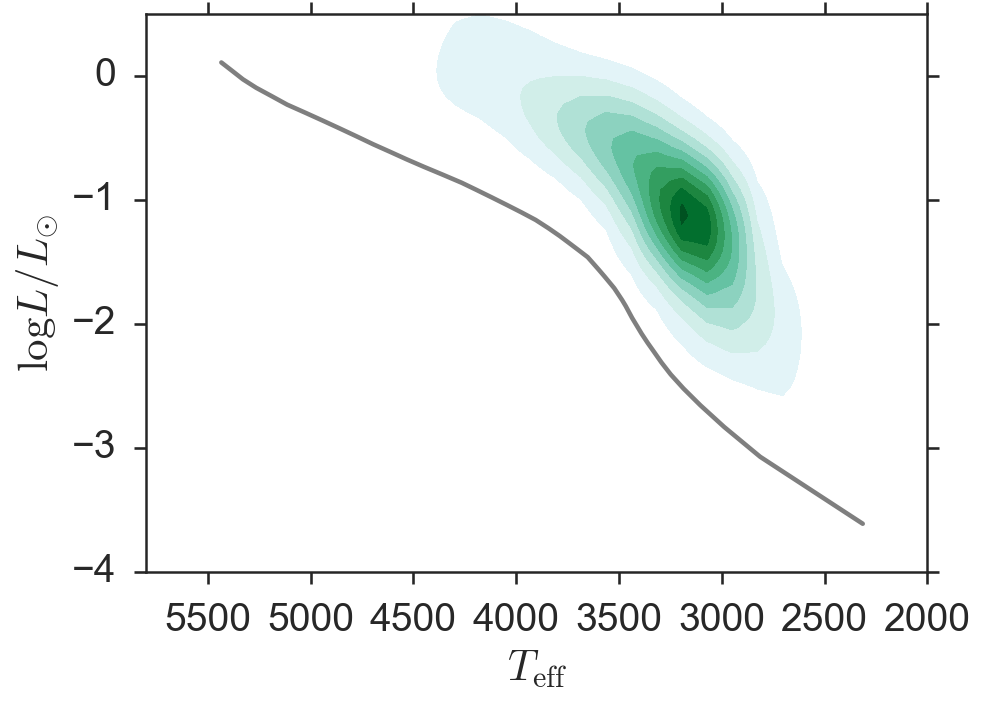

In [25]:
fig = plt.figure(figsize=(7, 5))
ax = plt.axes()


ax.set_xlim(5800, 2000);
ax.set_ylim(-4.0, 0.5);
ax.set_yticks(np.arange(-4, 0.0+1, 1.0))

for age, ls in zip([9.9], ['k-']):
    ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
    plt.plot(ev['Teff'].values,ev['logL'].values, ls, alpha=0.5, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

    
ax = sns.kdeplot(luhman2007_tbl6.T_eff, np.log10(luhman2007_tbl6.L_bol), shade=True,
                 shade_lowest=False)
#ax.plot([5777.0], [0.0], 'yo', label = 'Sun $\log{\mathrm{Age (yr)}} = 9.66$')

ax.set_xlabel('$T_\mathrm{eff}$')
ax.set_ylabel('$\log{L/L_{\odot}}$')
plt.savefig('../results/pre_main_sequence.png', dpi=300, bbox_inches='tight')

## Frame 3: evolutionary tracks

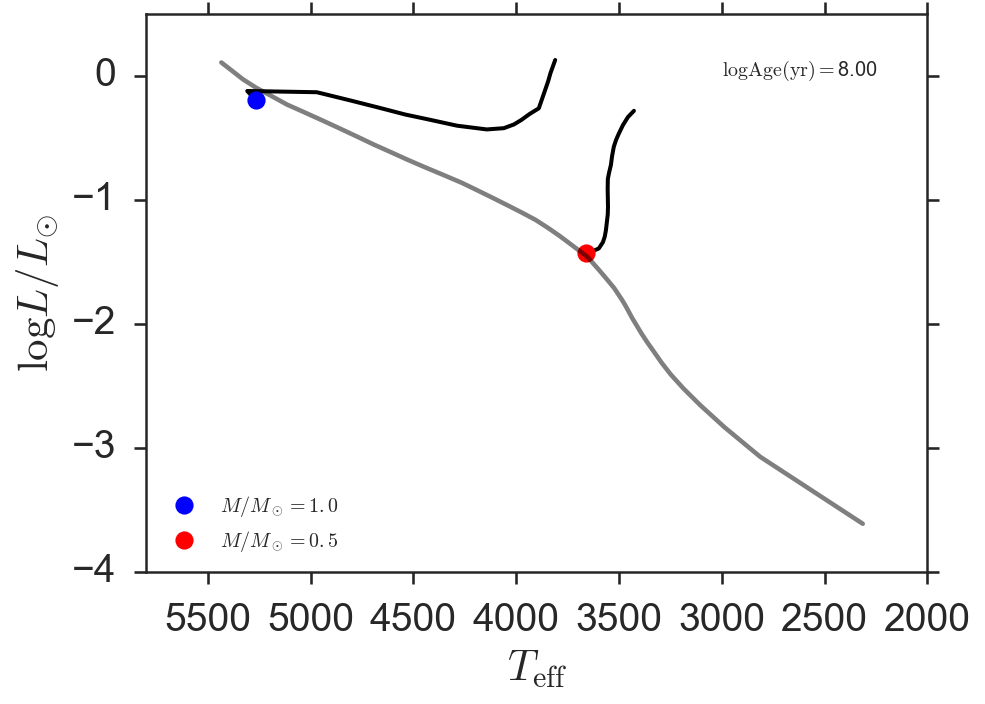

In [38]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

fig = plt.figure(figsize=(7, 5))
ax = plt.axes()

ax.set_xlabel('$T_\mathrm{eff}$')
ax.set_ylabel('$\log{L/L_{\odot}}$')
ax.set_xlim(5800, 2000);
ax.set_ylim(-4.0, 0.5);
ax.set_yticks(np.arange(-4, 0.0+1, 1.0))


mass1 = 1.0
ev1 = bcah.evtrack(mass1,dage=0.01, minage=6.0, maxage=8.01)

mass2 = 0.5
ev2 = bcah.evtrack(mass2,dage=0.01, minage=6.0, maxage=8.01)

age_vec = np.arange(6.0, 8.01, 0.01)
n_times = len(ev2)

# First set up the figure, the axis, and the plot element we want to animate
line1, = ax.plot([], [], 'k', lw=2)
line2, = ax.plot([], [], 'k', lw=2)
spot1, = ax.plot([], [], 'bo', label='$M/M_\odot = 1.0$')
spot2, = ax.plot([], [], 'ro', label='$M/M_\odot = 0.5$')
text1 = ax.text(3000, 0.0, '', fontsize=10)

ax.legend(loc='lower left', ncol=1, fontsize=10)

for age, ls in zip([9.9], ['k-']):
    ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
    plt.plot(ev['Teff'],ev['logL'], ls, alpha=0.5, label=None)
    

    
# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

# animation function.  This is called sequentially
def animate(i):
    line1.set_data(ev1['Teff'][0:i], ev1['logL'][0:i])
    line2.set_data(ev2['Teff'][0:i], ev2['logL'][0:i])
    spot1.set_data(ev1['Teff'][i], ev1['logL'][i])
    spot2.set_data(ev2['Teff'][i], ev2['logL'][i])
    text1.set_text('$\log{\mathrm{Age (yr)}} = $'+'{:0.2f}'.format(age_vec[i]))
    return line1, line2


# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_times, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('../results/hrd_animation_1msun_6_8.mp4', fps=10, dpi=300, writer='ffmeg_files',
          savefig_kwargs={'bbox_inches':'tight'})

### Frame 4: Isochrones

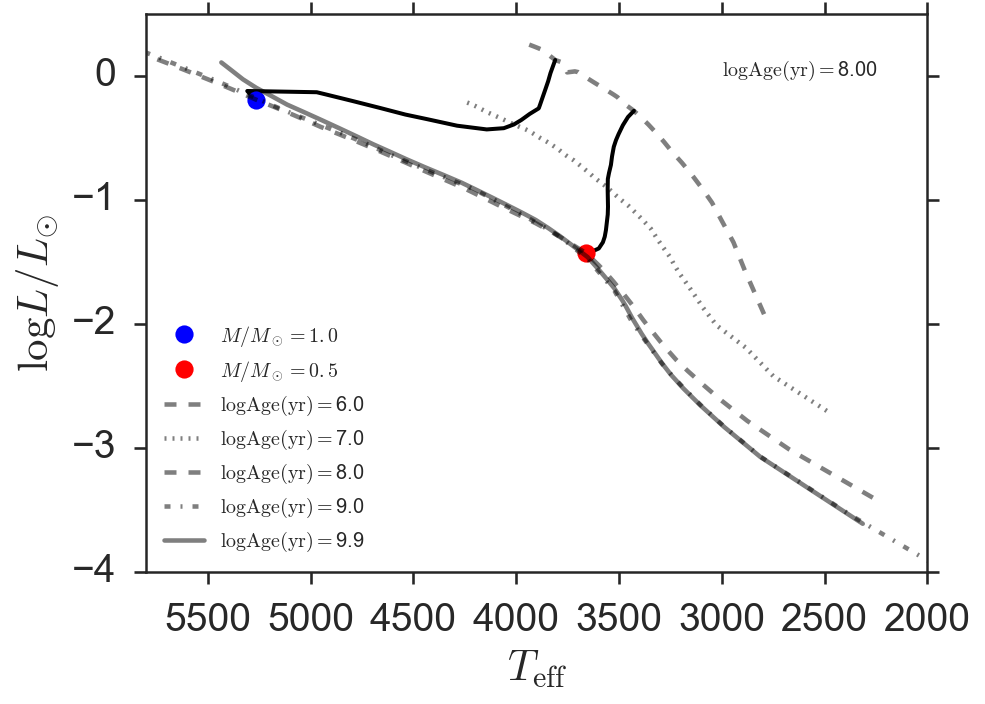

In [43]:
fig = plt.figure(figsize=(7, 5))
ax = plt.axes()

ax.set_xlabel('$T_\mathrm{eff}$')
ax.set_ylabel('$\log{L/L_{\odot}}$')
ax.set_xlim(5800, 2000);
ax.set_ylim(-4.0, 0.5);
ax.set_yticks(np.arange(-4, 0.0+1, 1.0))


mass1 = 1.0
ev1 = bcah.evtrack(mass1,dage=0.01, minage=6.0, maxage=8.01)

mass2 = 0.5
ev2 = bcah.evtrack(mass2,dage=0.01, minage=6.0, maxage=8.01)

age_vec = np.arange(6.0, 8.01, 0.01)
n_times = len(ev2)

# First set up the figure, the axis, and the plot element we want to animate
line1, = ax.plot([], [], 'k', lw=2)
line2, = ax.plot([], [], 'k', lw=2)
spot1, = ax.plot([], [], 'bo', label='$M/M_\odot = 1.0$')
spot2, = ax.plot([], [], 'ro', label='$M/M_\odot = 0.5$')
text1 = ax.text(3000, 0.0, '', fontsize=10)

for age, ls in zip([6.0, 7.0, 8.0, 9.0, 9.9], ['k--', 'k:', 'k--', 'k-.', 'k-']):
    ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
    plt.plot(ev['Teff'],ev['logL'], ls, alpha=0.5, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

ax.legend(loc='lower left', ncol=1, fontsize=10)
    
# animation function.  This is called sequentially

line1.set_data(ev1['Teff'], ev1['logL'])
line2.set_data(ev2['Teff'], ev2['logL'])
spot1.set_data(ev1['Teff'][n_times-1], ev1['logL'][n_times-1])
spot2.set_data(ev2['Teff'][n_times-1], ev2['logL'][n_times-1])
text1.set_text('$\log{\mathrm{Age (yr)}} = $'+'{:0.2f}'.format(age_vec[-1]))



plt.savefig('../results/hrd_isochrones.png', dpi=300, bbox_inches='tight')

## Make an initial mass function
wikipedia has the functional forms:  
https://en.wikipedia.org/wiki/Initial_mass_function

Let's use the Chabrier IMF, and [this Stack Overflow answer](http://scicomp.stackexchange.com/questions/1658/define-custom-probability-density-function-in-python)



$\xi (m)\Delta m=0.158(1/m)\exp[-(\log(m)-\log(0.08))^{2}/(2\times 0.69^{2})]$

In [44]:
import scipy.stats as st

In [45]:
class imf_pdf(st.rv_continuous):
    def _pdf(self,ms):
        return 0.086/0.2829295124386278*(1/ms)*np.exp(-1.0*(np.log10(ms) - np.log10(0.22))**2/(2.0*0.57**2))

In [46]:
my_cv = imf_pdf(a=1.0E-4, b=100, name='my_pdf')

In [47]:
def imf_pdf_indiv(ms):
    pdf = 0.158*(1/ms)*np.exp(-1.0*(np.log10(ms) - np.log10(0.08))**2/(2.0*0.69**2))
    return pdf

def imf_pdf_sys(ms):
    pdf = 0.086/0.2829295124386278*(1/ms)*np.exp(-1.0*(np.log10(ms) - np.log10(0.22))**2/(2.0*0.57**2))
    return pdf

In [48]:
m_vec = np.arange(0.001, 20.0, 0.001)

In [49]:
ps = imf_pdf_sys(m_vec)

In [50]:
gi = m_vec > 1.0

In [51]:
ps_sal = 0.045/0.2829295124386278*m_vec[gi]**(-2.3)

In [53]:
#plt.plot(m_vec, ps)
#plt.plot(m_vec[gi], ps_sal)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel('$M/M_{\odot}$')
#plt.ylabel('$p(M)$')

In [54]:
#plt.plot(m_vec, ps)
#plt.plot(m_vec[gi], ps_sal)
#plt.xlabel('$M/M_{\odot}$')
#plt.xlim(-0.1, 2)
#plt.ylabel('$p(M)$')

### Verify that it is normalized.

In [55]:
import scipy.integrate as integrate

In [56]:
norm_constant = integrate.quad(imf_pdf_sys, 0, 100)
norm_constant

(1.0, 5.835266472055946e-12)

## Draw samples from the IMF

In [60]:
#ax = sns.distplot(my_cv.rvs(size=20), rug=True, hist=False)
#ax = sns.distplot(m_vec, rug=True, hist=False)
#ax.set_xscale('log')
#m_demo = np.arange(0, 3, 0.001)
#ax.plot(m_demo, my_cv.pdf(m_demo), 'r-')
#ax.set_xlim(0,3)

In [59]:
#m_demo = np.arange(0, 10, 0.01)
#plt.plot(m_demo, my_cv.cdf(m_demo), 'r-')
#plt.ylim(0.8, 1)

## Combine it all and plot the IMF

In [61]:
m_vec = my_cv.rvs(size=200)

### Frame 5: Explicitly show the draws from the IMF

In [62]:
ev_list = np.zeros((len(m_vec), 2)).T

for i in range(len(m_vec)):
    ev = bcah.evtrack(m_vec[i],dage=0.01, minage=6.0, maxage=7.0)
    ev_list[:,i] = ev['Teff'][50],ev['logL'][50]

ev_list = ev_list[:,ev_list.sum(axis=0) >0]

In [77]:
_, n_ev = ev_list.shape

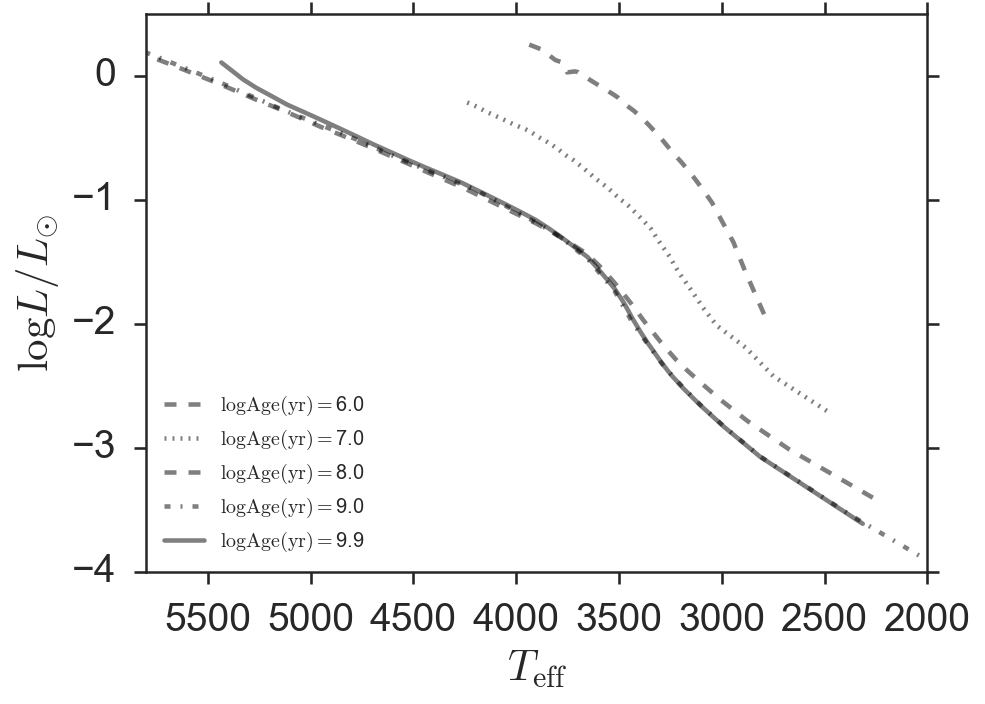

In [79]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

fig = plt.figure(figsize=(7, 5))
ax = plt.axes()

ax.set_xlabel('$T_\mathrm{eff}$')
ax.set_ylabel('$\log{L/L_{\odot}}$')
ax.set_xlim(5800, 2000);
ax.set_ylim(-4.0, 0.5);
ax.set_yticks(np.arange(-4, 0.0+1, 1.0))


mass1 = 1.0
ev1 = bcah.evtrack(mass1,dage=0.01, minage=6.0, maxage=8.01)

mass2 = 0.5
ev2 = bcah.evtrack(mass2,dage=0.01, minage=6.0, maxage=8.01)

age_vec = np.arange(6.0, 8.01, 0.01)
n_times = len(ev2)

# First set up the figure, the axis, and the plot element we want to animate
spot2, = ax.plot([], [], 'ro', alpha=0.5)

for age, ls in zip([6.0, 7.0, 8.0, 9.0, 9.9], ['k--', 'k:', 'k--', 'k-.', 'k-']):
    ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
    plt.plot(ev['Teff'],ev['logL'], ls, alpha=0.5, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

ax.legend(loc='lower left', ncol=1, fontsize=10)

    
# initialization function: plot the background of each frame

# animation function.  This is called sequentially
def animate(i):
    spot2.set_data(ev_list[0,0:i], ev_list[1, 0:i])
    return spot2,


# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               frames=n_ev, interval=20, blit=False)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('../results/IMF_draws.mp4', fps=10, dpi=300, writer='ffmpeg_file',
          savefig_kwargs={'bbox_inches':'tight'})

In [221]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

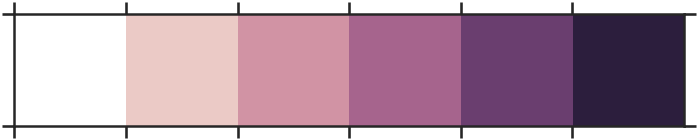

In [222]:
sns.palplot(sns.cubehelix_palette(light=1))

In [223]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

In [307]:
_,n_ev = ev_list.shape

### Frame 6: Reality

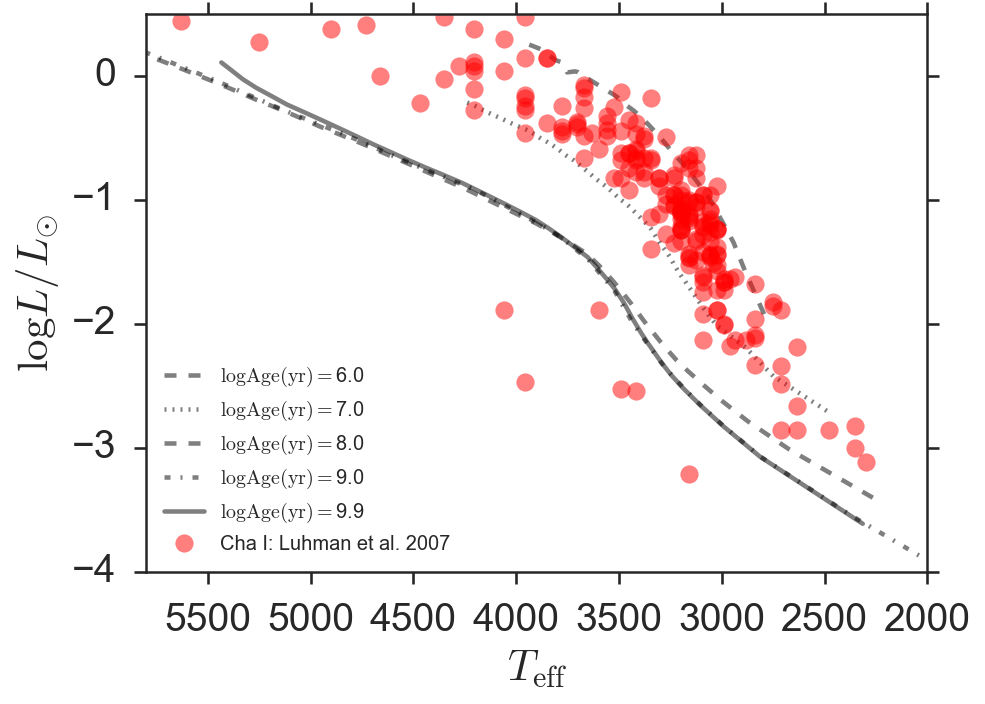

In [81]:
fig = plt.figure(figsize=(7, 5))
ax = plt.axes()

ax.set_xlabel('$T_\mathrm{eff}$')
ax.set_ylabel('$\log{L/L_{\odot}}$')
ax.set_xlim(5800, 2000);
ax.set_ylim(-4.0, 0.5);
ax.set_yticks(np.arange(-4, 0.0+1, 1.0))

for age, ls in zip([6.0, 7.0, 8.0, 9.0, 9.9], ['k--', 'k:', 'k--', 'k-.', 'k-']):
    ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
    plt.plot(ev['Teff'],ev['logL'], ls, alpha=0.5, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

plt.plot(luhman2007_tbl6.T_eff, np.log10(luhman2007_tbl6.L_bol), 'ro', alpha=0.5,
         label='Cha I: Luhman et al. 2007')
    
ax.legend(loc='lower left', ncol=1, fontsize=10)


plt.savefig('../results/hrd_observed.png', dpi=300, bbox_inches='tight')

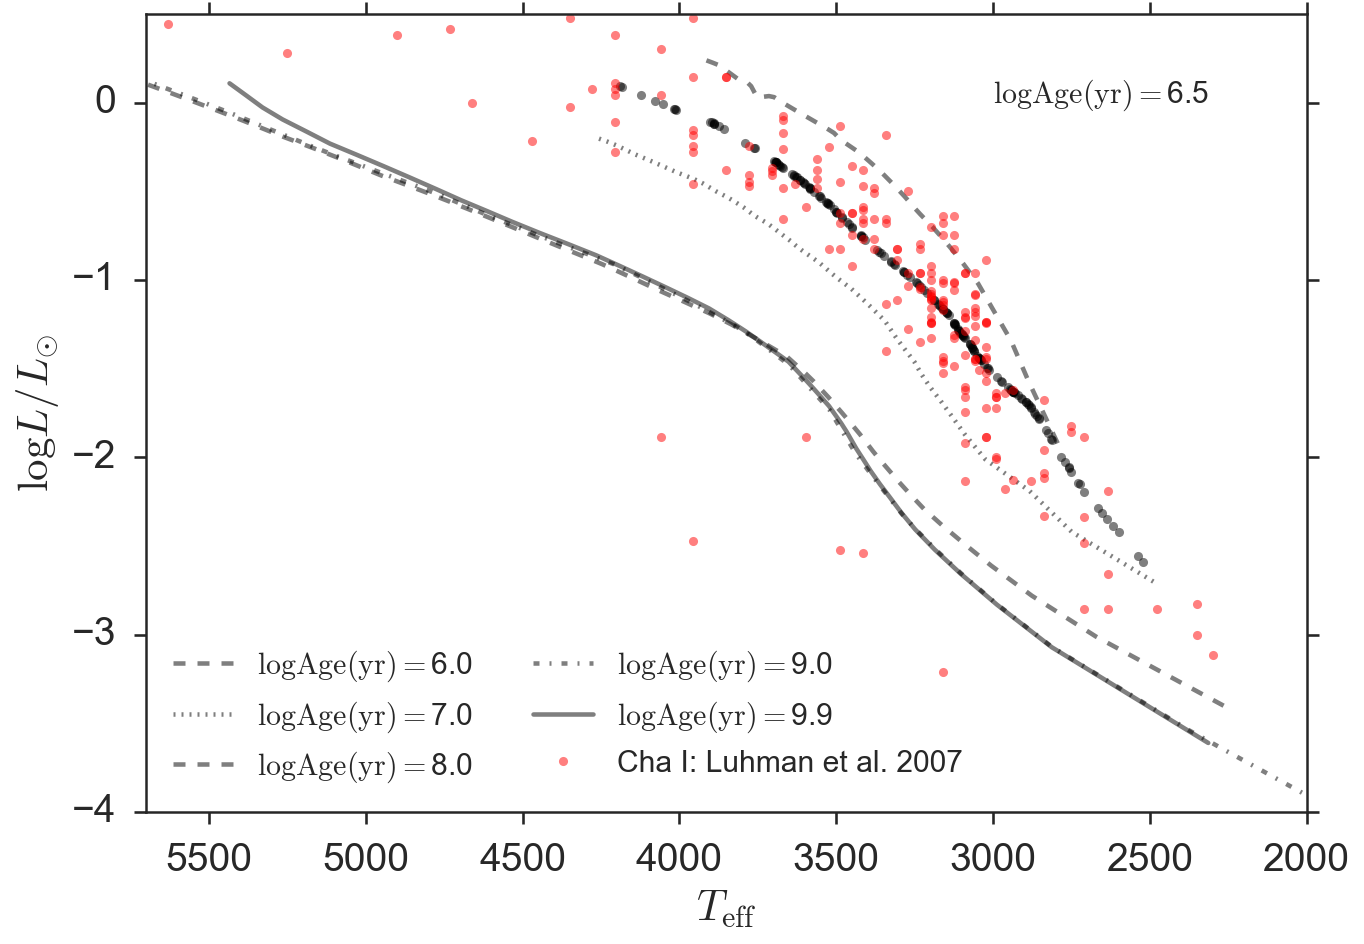

In [322]:
plt.plot(ev_list[0,:],
         ev_list[1,:],'k.', alpha=0.5)

for age, ls in zip([6.0, 7.0, 8.0, 9.0, 9.9], ['k--', 'k:', 'k--', 'k-.', 'k-']):
    ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
    plt.plot((ev['Teff']),ev['logL'], ls, alpha=0.5, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

#ax = sns.kdeplot(luhman2009_tbl2.T_eff, np.log10(luhman2009_tbl2.L_bol), shade=True, shade_lowest=False)
plt.plot(luhman2007_tbl6.T_eff, np.log10(luhman2007_tbl6.L_bol), 'r.', alpha=0.5,
         label='Cha I: Luhman et al. 2007')


plt.text(3000, 0.0, '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(6.5), fontsize=15)

plt.xlabel('$T_\mathrm{eff}$')
plt.ylabel('$\log{L/L_{\odot}}$')
plt.xlim(5700, 2000);
plt.ylim(-4.0, 0.5);
plt.yticks(np.arange(-4, 0.0+1, 1.0))
plt.legend(loc='lower left', ncol=2, fontsize=15)

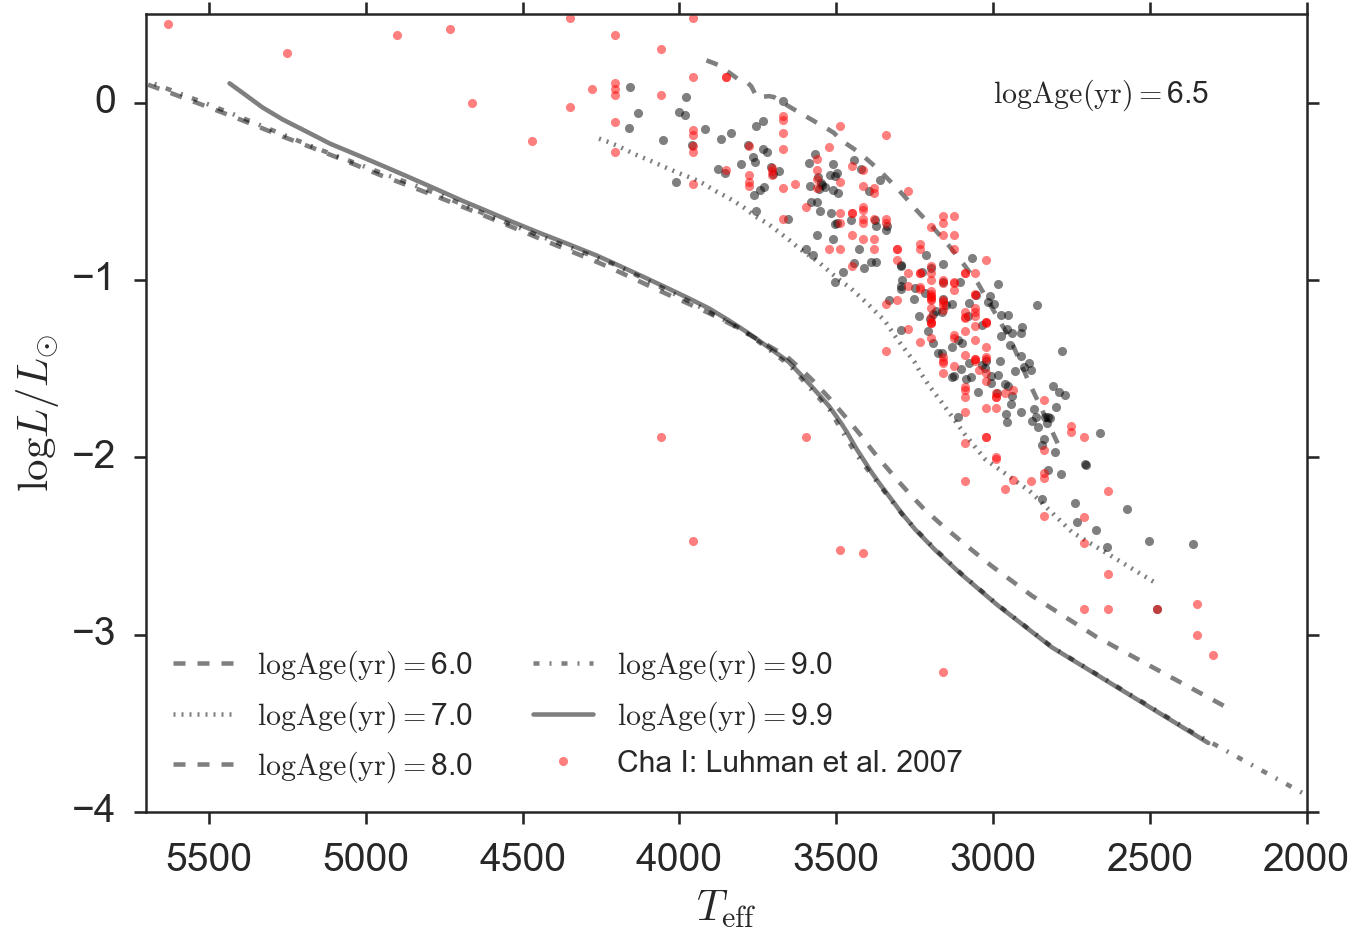

In [321]:
plt.plot(ev_list[0,:]+np.random.normal(0, 90, n_ev),
         ev_list[1,:]+np.random.normal(0, 0.15, n_ev),'k.', alpha=0.5)

for age, ls in zip([6.0, 7.0, 8.0, 9.0, 9.9], ['k--', 'k:', 'k--', 'k-.', 'k-']):
    ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
    plt.plot((ev['Teff']),ev['logL'], ls, alpha=0.5, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

#ax = sns.kdeplot(luhman2009_tbl2.T_eff, np.log10(luhman2009_tbl2.L_bol), shade=True, shade_lowest=False)
plt.plot(luhman2007_tbl6.T_eff, np.log10(luhman2007_tbl6.L_bol), 'r.', alpha=0.5,
         label='Cha I: Luhman et al. 2007')


plt.text(3000, 0.0, '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(6.5), fontsize=15)

plt.xlabel('$T_\mathrm{eff}$')
plt.ylabel('$\log{L/L_{\odot}}$')
plt.xlim(5700, 2000);
plt.ylim(-4.0, 0.5);
plt.yticks(np.arange(-4, 0.0+1, 1.0))
plt.legend(loc='lower left', ncol=2, fontsize=15)

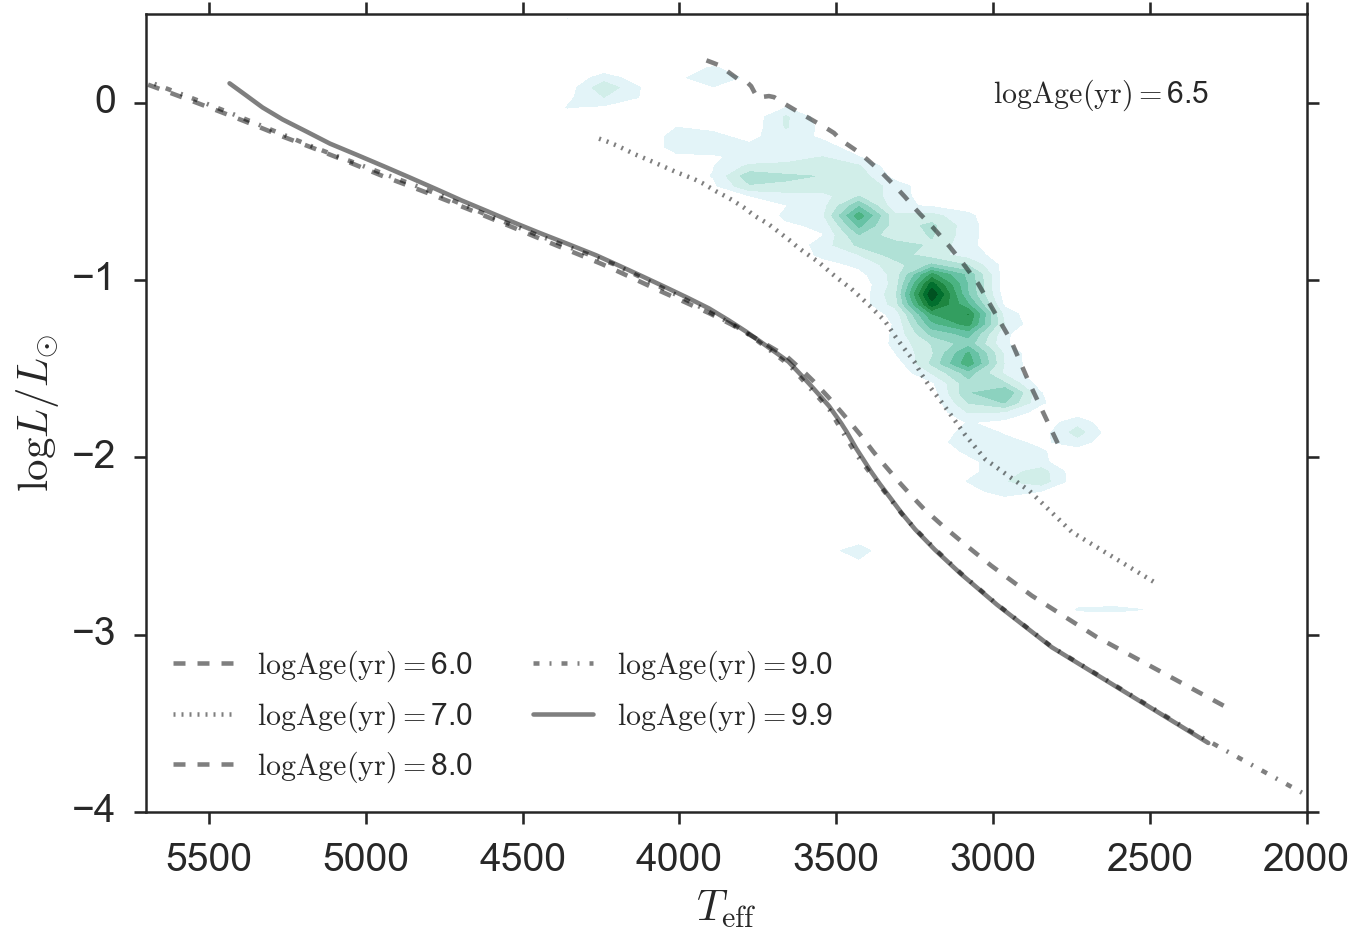

In [318]:
for mass in m_vec:
    ev = bcah.evtrack(mass,dage=0.01, minage=6.0, maxage=7.0)
    #plt.plot(ev['Teff'].values,ev['logL'].values,'k-', alpha=1.0)
    #plt.plot(ev['Teff'][50],ev['logL'][50],'k.', alpha=0.5)

for age, ls in zip([6.0, 7.0, 8.0, 9.0, 9.9], ['k--', 'k:', 'k--', 'k-.', 'k-']):
    ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
    plt.plot((ev['Teff']),ev['logL'], ls, alpha=0.5, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

#ax = sns.kdeplot(luhman2009_tbl2.T_eff, np.log10(luhman2009_tbl2.L_bol), shade=True, shade_lowest=False)
ax = sns.kdeplot(luhman2007_tbl6.T_eff, np.log10(luhman2007_tbl6.L_bol), shade=True,
                 shade_lowest=False,  bw=(50, 0.05))
#sns.kdeplot(ev_list[0, :], ev_list[1, :], shade=False, shade_lowest=False, bw=(50, 0.05))
#plt.plot(luhman2007_tbl6.T_eff, np.log10(luhman2007_tbl6.L_bol), 'r.', alpha=0.5,
#         label='Cha I: Luhman et al. 2007')


plt.text(3000, 0.0, '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(6.5), fontsize=15)

plt.xlabel('$T_\mathrm{eff}$')
plt.ylabel('$\log{L/L_{\odot}}$')
plt.xlim(5700, 2000);
plt.ylim(-4.0, 0.5);
plt.yticks(np.arange(-4, 0.0+1, 1.0))
plt.legend(loc='lower left', ncol=2, fontsize=15)

In [ ]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

fig = plt.figure(figsize=(7, 5))
ax = plt.axes()

ax.set_xlabel('$T_\mathrm{eff}$')
ax.set_ylabel('$\log{L/L_{\odot}}$')
ax.set_xlim(5800, 2000);
ax.set_ylim(-4.0, 0.5);
ax.set_yticks(np.arange(-4, 0.0+1, 1.0))

for age, ls in zip([6.0, 7.0, 8.0, 9.0, 9.9], ['k--', 'k:', 'k--', 'k-.', 'k-']):
    ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
    plt.plot(ev['Teff'],ev['logL'], ls, alpha=0.5, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

#ax.plot([5777.0], [0.0], 'yo', label = 'Sun $\log{\mathrm{Age (yr)}} = 9.66$')
    
mass1 = 1.0
ev1 = bcah.evtrack(mass1,dage=0.01, minage=6.0, maxage=9.9)

mass2 = 0.5
ev2 = bcah.evtrack(mass2,dage=0.01, minage=6.0, maxage=9.9)

age_vec = np.arange(6.0, 9.9, 0.01)
n_times = len(ev2)

# First set up the figure, the axis, and the plot element we want to animate
line1, = ax.plot([], [], 'k', lw=2)
line2, = ax.plot([], [], 'k', lw=2)
spot1, = ax.plot([], [], 'bo', label='$M/M_\odot = 1.0$')
spot2, = ax.plot([], [], 'ro', label='$M/M_\odot = 0.5$')
text1 = ax.text(3000, 0.0, '', fontsize=10)


# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

# animation function.  This is called sequentially
def animate(i):
    line1.set_data(ev1['Teff'][0:i], ev1['logL'][0:i])
    line2.set_data(ev2['Teff'][0:i], ev2['logL'][0:i])
    spot1.set_data(ev1['Teff'][i], ev1['logL'][i])
    spot2.set_data(ev2['Teff'][i], ev2['logL'][i])
    text1.set_text('$\log{\mathrm{Age (yr)}} = $'+'{:0.2f}'.format(age_vec[i]))
    return line1, line2

ax.legend(loc='lower left', ncol=2, fontsize=10)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_times, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('hrd_animation_IMF.mp4', fps=10, dpi=300)